# 2D plate capacitor example

In [2]:
from pinnfem import Rect, Circ, plot_geo, wrap_to_mesh, solve
from ngsolve.webgui import Draw

Got a list of 4 geometries.


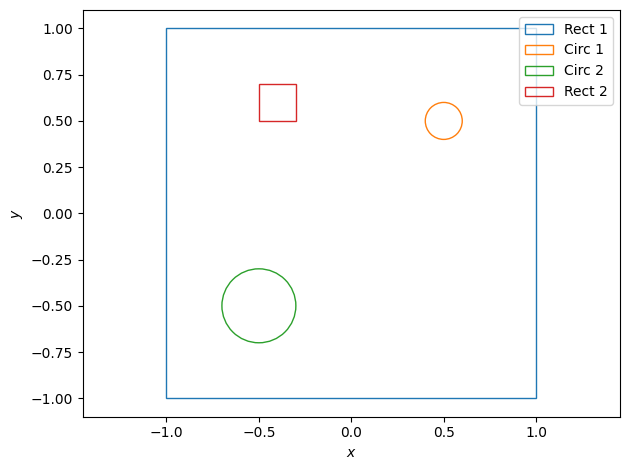

In [3]:
solve_BC = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
Ω = Rect(-1, -1, 2, 2, BC=solve_BC)

solve_BC = {"bc": "bc_plate1", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 10}
plate1 = Circ(0.5, 0.5, 0.1, BC=solve_BC)

solve_BC = {"bc": "bc_plate2", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -10}
plate2 = Circ(-0.5, -0.5, 0.2, BC=solve_BC)

solve_BC = {"bc": "bc_plate3", "mat": "el_mat", "mat_perm": 2.0, "pot_val": 15}
plate3 = Rect(-0.5, 0.5, 0.2, 0.2, BC=solve_BC)

plot_geo([Ω, plate1, plate2, plate3])

In [4]:
refinement = 0.05
mesh = wrap_to_mesh(Ω, [plate1, plate2, plate3], refinement)

In [5]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [6]:
# solve and get grid function
gfu = solve(Ω, [plate1, plate2, plate3], refinement)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [7]:
from pinnfem import exclude_points_in_region
import numpy as np

In [21]:
import matplotlib.pyplot as plt


def plot_results(X, Y, val):
    val = val.reshape(X.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, val, 100, cmap="coolwarm", vmin=np.min(val), vmax=np.max(val))
    plt.colorbar(label="Potential u(x, y)")
    plt.title("Predicted Potential Distribution")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

In [8]:
X, Y, Pt = Ω.generate_grid()
print(Pt.shape)
Pts = exclude_points_in_region(Pt, [plate1, plate2, plate3])
x, y = Pts[:, 0], Pts[:, 1]
X, Y = np.meshgrid(x, y)
vals = np.array([gfu(mesh(*p)) for p in Pts])
# X,Y,Pts

(10000, 2)
Got a list of 3 geometries to exclude.


In [9]:
X.shape, Y.shape, vals.shape

((9617, 9617), (9617, 9617), (9617,))

In [10]:
plt.contourf(X, Y, vals, 100, cmap="coolwarm")

NameError: name 'plt' is not defined

In [24]:
plot_results(X, Y, vals)

ValueError: cannot reshape array of size 9617 into shape (9617,9617)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy-Daten für X, Y und vals
# X, Y sind Gitternetze mit Shape (9617, 9617)
x = np.linspace(-10, 10, 9617)
y = np.linspace(-10, 10, 9617)
X, Y = np.meshgrid(x, y)

# Beispielwerte für vals (9617,)
vals = np.sin(np.linspace(0, 20, 9617))

# Reshape von vals auf (9617, 9617)
Z = np.tile(vals, (9617, 1))

# Plotten mit contourf
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 100, cmap="coolwarm")
plt.colorbar(contour)
plt.title("Contourf Plot von X, Y und reshaped vals")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
plt.show()